# Introduction to Regression with Neural networks in TensorFlow

predicting a numerical variable based on some other combination of variables

In [3]:
import tensorflow as tf
tf.__version__

'2.8.0'

## create data to view and fit

In [4]:
import numpy as np
import matplotlib.pyplot as plt

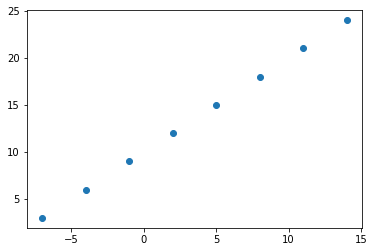

In [5]:
# create features
X = np.array([-7., -4., -1., 2.,5.,8.,11., 14.])

# create labels
y = np.array([3.,6.,9.,12.,15.,18.,21,24.])

# visualize it
plt.scatter(X, y)

In [6]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## input and output shaped

In [7]:
# create a demo tensor for housing price prediction problem
house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [8]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [10]:
X[0].ndim

0

In [11]:
# Turn numpy array into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X.shape, y.shape

(TensorShape([8]), TensorShape([8]))

In [12]:
tf.reshape(X, shape=(1,8))

<tf.Tensor: shape=(1, 8), dtype=float32, numpy=array([[-7., -4., -1.,  2.,  5.,  8., 11., 14.]], dtype=float32)>

## steps in modelling with tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model
2. **Compiling a model** - define a loss function (tells our model how wrong it is) and an optimizer (tells our model how to improve the pattern its learning) and evaluation metrics (used to interpret the performance of our model)
3. **fitting a model** - letting the model try to find patterns between X & y (features and labels)

In [13]:
tf.random.set_seed(42)

# 1. create a model using the sequential API
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss='mae', # mean absolute error (y - y_predict)
              optimizer='sgd', # SGD is stochastic gradient descent
              metrics=['mae']
              )

# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 619ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


In [14]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# try and make a prediction using our model
model.predict([17.])

array([[12.716021]], dtype=float32)

## improve our model

1. when creating the model, we can add more layers, increase neurons, change the activation function of each layer
2. compiling a model - change the optimization function and the learning rate
3. fitting a model - more epochs (let the model learn longer) or on more data

In [16]:
# let's rebuild our model

# 1. create the model
model = tf.keras.Sequential([
      tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss='mae',
              optimizer='sgd',
              metrics=['mae'])

# 3. fit the model
model.fit(tf.expand_dims(X,axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 315ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================]

In [17]:
model.predict([17])

array([[29.739855]], dtype=float32)

In [18]:
# after some expiriments, the learning rate seems to be the most important factor
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50,activation=None))
model.add(tf.keras.layers.Dense(1))

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['mae'])

model.fit(tf.expand_dims(X, -1), y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 0s 481ms/step - loss: 11.7682 - mae: 11.7682
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 11.0963 - mae: 11.0963
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 10.4150 - mae: 10.4150
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 9.7212 - mae: 9.7212
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 9.0104 - mae: 9.0104
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 8.2778 - mae: 8.2778
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 7.5198 - mae: 7.5198
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 6.9648 - mae: 6.9648
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 7.0672 - mae: 7.0672
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 7.3315 - mae: 7.3315
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - 

In [19]:
model.predict([17])

array([[26.58353]], dtype=float32)

## Evaluting a model

In practice, a typical workflow you will go through when building neural networks is:

build a model -> fit it -> evaluate it -> tweak it
-> fit -> evaluate ...


you need to visualize when you evaluate

> "visualize, visualize, visualize!!"

* the data
* the model itself
* the training of a model
* the predictions, how does it line up against the ground truth


In [20]:
# make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [21]:
# make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

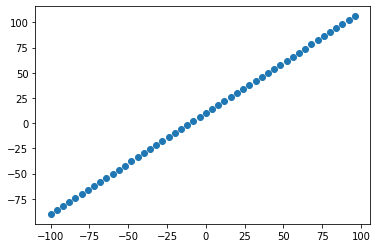

In [22]:
# visualize the data
plt.scatter(X, y)

### the 3 sets...

* training set - 70%
* validation set - tuned, 15%
* testing set - model get evaluated against this set, 15%

In [23]:
# check the length of how many samples we have
len(X)

50

In [24]:
# split the data into training and testing set
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

### visualize the data

now we get our data in training and test sets

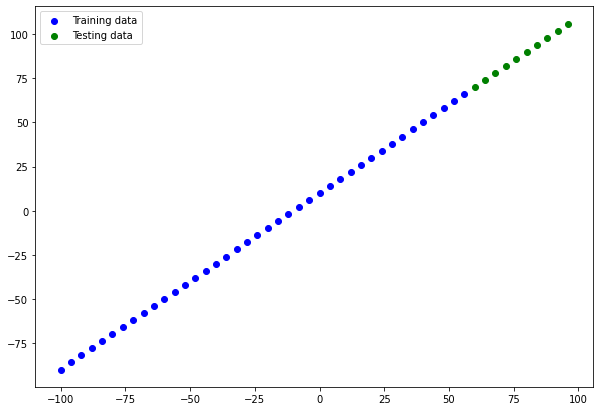

In [25]:
plt.figure(figsize=(10,7))

plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='g', label='Testing data')

plt.legend()

In [26]:
# build model again

mode = tf.keras.Sequential()
# mode.add(tf.keras.layers.Dense(50))
mode.add(tf.keras.layers.Dense(1))

mode.compile(loss='mae',
            #  optimizer=tf.keras.optimizers.Adam(lr=0.01),
             optimizer='sgd',
             metrics=['mae'])

# mode.fit(tf.expand_dims(X_train, -1), y_train, epochs=100)

In [27]:
model.predict([17])

array([[26.58353]], dtype=float32)

### visualize the model

In [28]:
# create a model which builds automatically by defining the input shape

tf.random.set_seed(42)

model = tf.keras.Sequential(name='model_1')
model.add(tf.keras.layers.Dense(10, input_shape=[1],name='input_layer'))
model.add(tf.keras.layers.Dense(1, name='output_layer'))
# model.add(tf.keras.layers.Dense(1))

model.compile(loss='mae',
              optimizer='sgd',
              metrics=['mae'])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model
* trainable parameters - these are the parameters (patterns) the model can update as it trains
* non-trainable params - these parameters aren't updated during training, typically when you bring in already learn patterns or parameters from other models during **transfer leaerning **

In [29]:
model.fit(X_train, y_train, epochs=100, verbose=0)

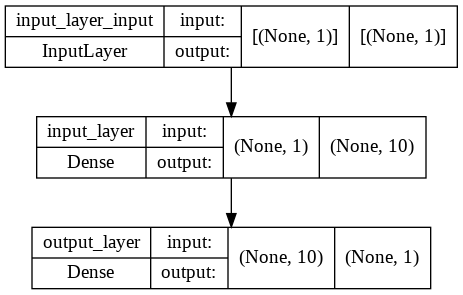

In [30]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### visualize our model's prediction

good idea to plot them against the ground truth labels

In [31]:
y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [32]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [33]:
# create a plotting function
def plot_predictions(train_data=X_train, 
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  plots training data, test data and compares predictions to ground truth labels
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label='training data')
  plt.scatter(test_data, test_labels, c='g', label='testing data')
  plt.scatter(test_data, predictions, c='r', label='prediction')

  plt.legend()

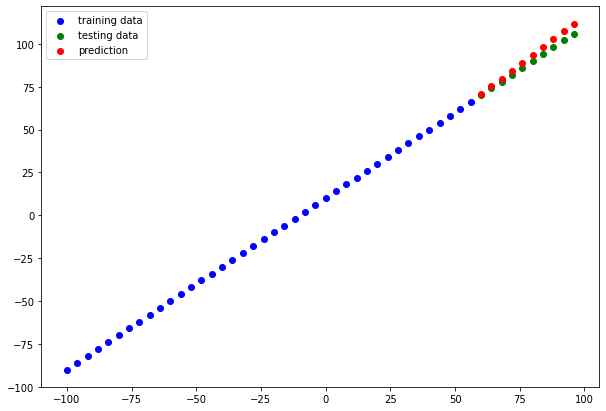

In [34]:
plot_predictions()

### evaluation metrics

for regression model, two of the main metrics:
* MAE - mean absolute error, "on average", how wrong is each of my model's prediction
* MSE - mean square error, "square the average errors"

In [35]:
# evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 156ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [36]:
# calculate the mean absolute error
tf.metrics.mean_absolute_error(y_test, model.predict(X_test))

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [37]:
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [38]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [39]:
y_pred = tf.constant(y_pred)
y_pred

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)>

In [40]:
y_pred = tf.squeeze(y_pred)
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [41]:
tf.metrics.mean_absolute_error(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [42]:
tf.metrics.mean_squared_error(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [77]:
# helper functions
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred)).numpy()

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true, tf.squeeze(y_pred)).numpy()

from urllib.request import DataHandler
### running experiments to improve our model

1. get more Data
2. make your model larger
3. train for longer

let's do 3 modelling experiments
1. same as the original model, 1 layer, train for 100 epochs
2. 2 layers, 100 epochs
3. 2 layers, 500 epochs

In [78]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential(name='model_1')
model_1.add(tf.keras.layers.Dense(1))

model_1.compile(loss='mae',
                optimizer='sgd',
                metrics=['mae'])

model_1.fit(tf.expand_dims(X_train, -1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 10ms/st

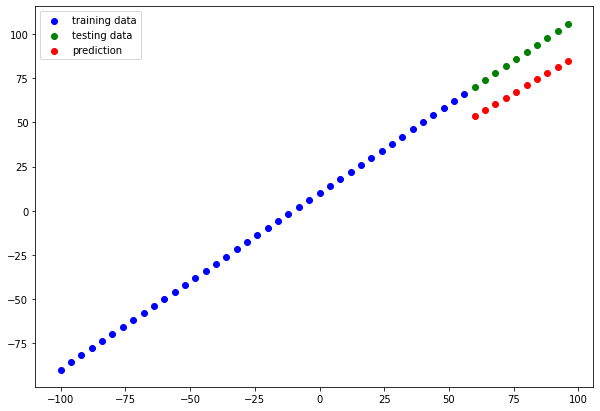

In [79]:
# make and plot predictions for model 1
y_pred_1 = model_1.predict(X_test)

plot_predictions(predictions=y_pred_1)

In [80]:
# calculate evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)

mae_1, mse_1

(18.745327, 353.57336)

Build model 2
* 2 dense layers, train for 100 epochs

In [81]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(10))
model_2.add(tf.keras.layers.Dense(1))

model_2.compile(loss='mae',
              # optimizer=tf.keras.optimizers.Adam(lr=0.01),
              optimizer='sgd',
              metrics=['mse'])

model_2.fit(tf.expand_dims(X_train, -1), y_train, epochs=100, verbose=2)

Epoch 1/100
2/2 - 0s - loss: 27.4058 - mse: 1084.1482 - 388ms/epoch - 194ms/step
Epoch 2/100
2/2 - 0s - loss: 24.6339 - mse: 777.9203 - 11ms/epoch - 6ms/step
Epoch 3/100
2/2 - 0s - loss: 29.8935 - mse: 1334.8955 - 12ms/epoch - 6ms/step
Epoch 4/100
2/2 - 0s - loss: 27.4055 - mse: 1106.8035 - 11ms/epoch - 5ms/step
Epoch 5/100
2/2 - 0s - loss: 14.9463 - mse: 281.1077 - 11ms/epoch - 5ms/step
Epoch 6/100
2/2 - 0s - loss: 11.8819 - mse: 168.6621 - 8ms/epoch - 4ms/step
Epoch 7/100
2/2 - 0s - loss: 11.1988 - mse: 151.3509 - 12ms/epoch - 6ms/step
Epoch 8/100
2/2 - 0s - loss: 11.0910 - mse: 160.3745 - 10ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 40.4763 - mse: 2586.0090 - 19ms/epoch - 9ms/step
Epoch 10/100
2/2 - 0s - loss: 27.8688 - mse: 1094.4382 - 15ms/epoch - 7ms/step
Epoch 11/100
2/2 - 0s - loss: 10.2473 - mse: 147.9359 - 11ms/epoch - 5ms/step
Epoch 12/100
2/2 - 0s - loss: 25.2803 - mse: 890.3867 - 10ms/epoch - 5ms/step
Epoch 13/100
2/2 - 0s - loss: 16.9897 - mse: 399.9678 - 10ms/epoch

In [82]:
y_pred_2 = model_2.predict(X_test)
y_pred_2

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

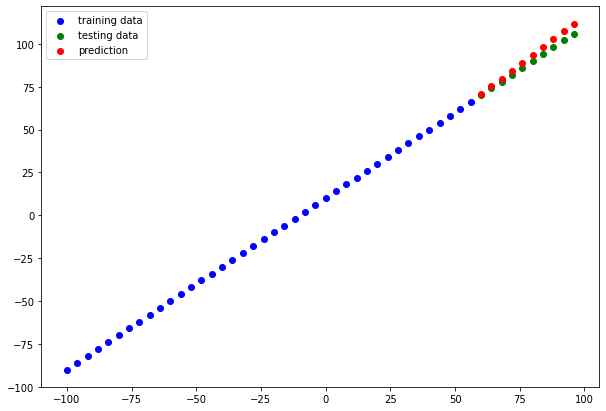

In [83]:
plot_predictions(predictions=y_pred_2)

In [84]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)

mae_2, mse_2

(3.1969407, 13.070143)

In [85]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(10))
model_3.add(tf.keras.layers.Dense(1))

model_3.compile(loss='mae',
              # optimizer=tf.keras.optimizers.Adam(lr=0.01),
              optimizer='sgd',
              metrics=['mse'])

model_3.fit(tf.expand_dims(X_train, -1), y_train, epochs=500, verbose=2)

Epoch 1/500
2/2 - 0s - loss: 27.4058 - mse: 1084.1482 - 361ms/epoch - 180ms/step
Epoch 2/500
2/2 - 0s - loss: 24.6339 - mse: 777.9203 - 8ms/epoch - 4ms/step
Epoch 3/500
2/2 - 0s - loss: 29.8935 - mse: 1334.8955 - 8ms/epoch - 4ms/step
Epoch 4/500
2/2 - 0s - loss: 27.4055 - mse: 1106.8035 - 11ms/epoch - 5ms/step
Epoch 5/500
2/2 - 0s - loss: 14.9463 - mse: 281.1077 - 11ms/epoch - 5ms/step
Epoch 6/500
2/2 - 0s - loss: 11.8819 - mse: 168.6621 - 11ms/epoch - 6ms/step
Epoch 7/500
2/2 - 0s - loss: 11.1988 - mse: 151.3509 - 12ms/epoch - 6ms/step
Epoch 8/500
2/2 - 0s - loss: 11.0910 - mse: 160.3745 - 11ms/epoch - 5ms/step
Epoch 9/500
2/2 - 0s - loss: 40.4763 - mse: 2586.0090 - 13ms/epoch - 7ms/step
Epoch 10/500
2/2 - 0s - loss: 27.8688 - mse: 1094.4382 - 9ms/epoch - 5ms/step
Epoch 11/500
2/2 - 0s - loss: 10.2473 - mse: 147.9359 - 7ms/epoch - 4ms/step
Epoch 12/500
2/2 - 0s - loss: 25.2803 - mse: 890.3867 - 7ms/epoch - 4ms/step
Epoch 13/500
2/2 - 0s - loss: 16.9897 - mse: 399.9678 - 11ms/epoch - 5

In [86]:
y_pred_3 = model_3.predict(X_test)
y_pred_3

array([[15.854742],
       [16.617329],
       [17.379915],
       [18.142504],
       [18.905092],
       [19.667677],
       [20.430264],
       [21.192854],
       [21.95544 ],
       [22.718027]], dtype=float32)

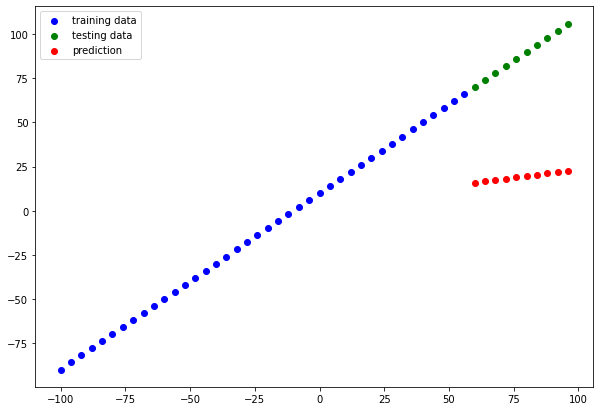

In [87]:
plot_predictions(predictions=y_pred_3)

In [88]:
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)

mae_3, mse_3

(68.713615, 4808.0273)

### comparing the results of our experiments

In [89]:
# let's compare our model's results using pandas Dataframe
import pandas as pd

models_results = [
                  ['model_1', mae_1, mse_1],
                  ['model_2', mae_2, mse_2],
                  ['model_3', mae_3, mse_3],
]

all_results = pd.DataFrame(models_results, 
                           columns=['model name', 'mae', 'mse'])

all_results

,model name,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


In [90]:
# model 2 looks like the best
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 10)                20        
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


> **NOTE** one of your main goals should be to minimize the time between experiments. The more experiements you do, the more things you will figure out which dont work and in turn, get closer to figuring out what does work. Remember, ML practioner's motto: "experiment, experiment, experiment!"

## tracking your experiment

one really good habit in ML modelling is to track the results of your experiments

And it can be tedious if you are running lots of experiments

Luckily, there are tools to help us!
* TensorBoard - a component of the TensorFlow library to help track modelling experiments
* Weights and Biases - a tool for tracking all kinds of ML exp (plugs straight into tensorBoard)

## saving our models

saving our models allows us to use them outside of google codlab, such as in a web app, or mobile app

there are tow main formats:
1. the savedModel format
2. the HDF5 format

In [91]:
# save model using the savedModel format, we got a folder, good in tensorFlow eco
model_2.save('best_model_savedModel_format')

INFO:tensorflow:Assets written to: best_model_savedModel_format/assets


In [92]:
# save model using the HDF5 format, we got one .h5 file, can be used by other programming
model_2.save('bst_mode_HDF5_format.h5')

## Loading in a saved model

In [93]:
# Load in the saved format model
loaded_SavedModel = tf.keras.models.load_model('/content/best_model_savedModel_format')

loaded_SavedModel.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 10)                20        
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [94]:
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 10)                20        
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [95]:
# compare prediction of the loaded model with origin model
model_2_pred = model_2.predict(X_test)
loaded_pred = loaded_SavedModel.predict(X_test)

model_2_pred == loaded_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [96]:
# load the model using H5 format
loaded_HDF5 = tf.keras.models.load_model('/content/bst_mode_HDF5_format.h5')
loaded_HDF5.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 10)                20        
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [97]:
model_2.predict(X_test) == loaded_HDF5.predict(X_test)

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## download a model from google codlab

1. right click the file in the files tab and click download

2. use code
3. google drive

In [98]:
# download a file
from google.colab import files

files.download('/content/bst_mode_HDF5_format.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## a larger example

In [100]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [101]:
# import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
# read in the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [106]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [104]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [107]:
pd.get_dummies(insurance['sex'], prefix='sex')

,sex_female,sex_male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [ ]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

In [113]:
# prepare feature set and label set
X = insurance_one_hot.drop(columns=['charges'])
y = insurance_one_hot['charges']

### using sklearn to divide our training and testing set

In [120]:
# prepare training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [121]:
1338 * 0.2

267.6

In [122]:
# index are already shuffled
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [123]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(1))

model.compile(loss='mae',
              optimizer='sgd',
              metrics=['mae','mse'])

# dataframe are built ontop of numpy array, and tensorflow convert numpy array to tensors automatically
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
34/34 - 0s - loss: 8698.0615 - mae: 8698.0615 - mse: 190085680.0000 - 393ms/epoch - 12ms/step
Epoch 2/100
34/34 - 0s - loss: 7873.5176 - mae: 7873.5176 - mse: 169341936.0000 - 44ms/epoch - 1ms/step
Epoch 3/100
34/34 - 0s - loss: 7603.3657 - mae: 7603.3657 - mse: 163563664.0000 - 45ms/epoch - 1ms/step
Epoch 4/100
34/34 - 0s - loss: 7729.8184 - mae: 7729.8184 - mse: 168280816.0000 - 45ms/epoch - 1ms/step
Epoch 5/100
34/34 - 0s - loss: 7764.1167 - mae: 7764.1167 - mse: 165907632.0000 - 47ms/epoch - 1ms/step
Epoch 6/100
34/34 - 0s - loss: 7643.4512 - mae: 7643.4512 - mse: 163580832.0000 - 47ms/epoch - 1ms/step
Epoch 7/100
34/34 - 0s - loss: 7550.1616 - mae: 7550.1616 - mse: 163353968.0000 - 46ms/epoch - 1ms/step
Epoch 8/100
34/34 - 0s - loss: 7722.2656 - mae: 7722.2656 - mse: 162120208.0000 - 50ms/epoch - 1ms/step
Epoch 9/100
34/34 - 0s - loss: 7553.2427 - mae: 7553.2427 - mse: 159819520.0000 - 54ms/epoch - 2ms/step
Epoch 10/100
34/34 - 0s - loss: 7731.8291 - mae: 7731.8291 - m

In [124]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8644.3604 - mae: 8644.3604 - mse: 108781176.0000


[8644.3603515625, 8644.3603515625, 108781176.0]

In [127]:
# the mae is so large comparing to median, not acceptable
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

### right now our model is not performing well, let's try and improve it!

In [138]:
# 1 add extra layer and use the adam optimizer
tf.random.set_seed(42)
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(100))
model_2.add(tf.keras.layers.Dense(10))
model_2.add(tf.keras.layers.Dense(1))

model_2.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['mae'])

model_2.fit(X_train, y_train, epochs=100, verbose=0)
model_2.evaluate(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


9/9 [==============================] - 0s 3ms/step - loss: 3167.3218 - mae: 3167.3218


[3167.32177734375, 3167.32177734375]

In [140]:
# 2 same as above but train longer (200 epochs)
tf.random.set_seed(42)
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(100))
model_3.add(tf.keras.layers.Dense(10))
model_3.add(tf.keras.layers.Dense(1))

model_3.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['mae'])

history = model_3.fit(X_train, y_train, epochs=200, verbose=0)
model_3.evaluate(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


9/9 [==============================] - 0s 2ms/step - loss: 3186.3911 - mae: 3186.3911


[3186.39111328125, 3186.39111328125]

Text(0.5, 0, 'epochs')

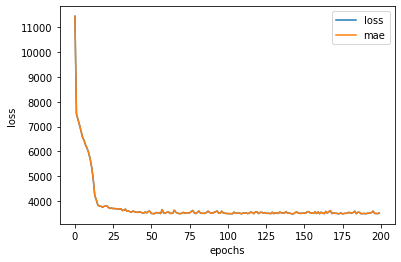

In [146]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

> How long should you train? the answer is: it depends on what problem you are solving. 
tensorFlow has solution as called "early stopping callback", which can be added to your model and ask it to stop once the improvement is less than a metric (i.e. the model stops improving for several epochs)

## Preprocessing data (normalization and standarzation)

In terms of scaling values, neural networks tend to prefer normalization

if you are not sure which to use, you could try both and see which performs better

In [148]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


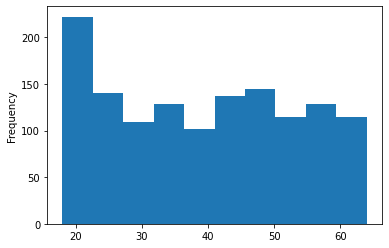

In [151]:
X['age'].plot(kind='hist')

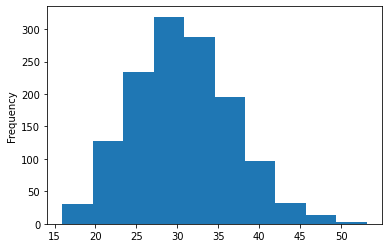

In [152]:
X['bmi'].plot(kind='hist')

In [153]:
X['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

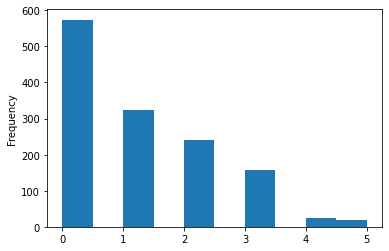

In [154]:
X['children'].plot(kind='hist')

In [155]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [156]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### To prepare our data, we can borrow a few classes from Scikit-learn

In [158]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# create X, y
X = insurance.drop(columns=['charges'])
y = insurance['charges']

# build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data (test data shall not be included)
ct.fit(X_train)

# transform training and test data with normalization
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [163]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [161]:
# what does our data look like
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [164]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Our data has been normalized and one hot encoded. now let's build a neural network model on it and see how it improves

In [166]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(1))

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['mae'])

model.fit(X_train_normal, y_train, epochs=100, verbose=0)

# if we train on normalized data, we have to evaluate it on normalized data as well
model.evaluate(X_test_normal, y_test)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


9/9 [==============================] - 0s 2ms/step - loss: 3176.3691 - mae: 3176.3691


[3176.369140625, 3176.369140625]

> normalized model tend to converge faster